In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-01 10:38:26.241931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 23s 766ms/step - accuracy: 0.1875 - loss: 1.9005
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2328 - loss: 1.8486 - val_accuracy: 0.3221 - val_loss: 1.6738
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.3438 - loss: 1.6798
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3326 - loss: 1.6607 - val_accuracy: 0.4574 - val_loss: 1.5187
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.3672 - loss: 1.5735
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3581 - loss: 1.5508 - val_accuracy: 0.5051 - val_loss: 1.4164
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3203 - loss: 1.4824
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3670 - loss: 1.4787 - val_accuracy: 0.5103 - val_loss: 1.3353
Epoch 5/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4297 - loss: 1.4039
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4100 - loss: 1.4107 - val_accuracy: 0.5456 - val_loss: 1.2639
Epoch 6/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4844 - loss: 1.3585
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4204 - loss: 1.3753 - val_accuracy: 0.5632 - val_loss: 1.2056
Epoch 7/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4297 - loss: 1.3803
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4439 - loss: 1.3254 - val_accuracy: 0.6162 - val_loss: 1.1444
Epoch 8/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.3906 - loss: 1.3127
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4410 - loss: 1.2926 - val_accuracy: 0.6294 - val_loss: 1.0914
Epoch 9/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4609 - loss: 1.3028
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4853 - loss: 1.2473 - val_accuracy: 0.6529 - val_loss: 1.0365
Epoch 10/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4375 - loss: 1.3367
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4659 - loss: 1.2507 - val_accuracy: 0.6985 - val_loss: 0.9832
Epoch 11/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.4922 - loss: 1.1542
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5057 - loss: 1.1659 - val_accuracy: 0.7809 - val_loss: 0.9296
Epoch 12/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5547 - loss: 1.1104
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5367 - loss: 1.1196 - val_accuracy: 0.7838 - val_loss: 0.8862
Epoch 13/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5312 - loss: 1.1574
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5376 - loss: 1.1139 - val_accuracy: 0.7949 - val_loss: 0.8360
Epoch 14/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5469 - loss: 1.1118
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5430 - loss: 1.1144 - val_accuracy: 0.8147 - val_loss: 0.8045
Epoch 15/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6172 - loss: 1.0346
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5820 - loss: 1.0475 - val_accuracy: 0.8154 - val_loss: 0.7660
Epoch 16/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6484 - loss: 0.8762
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5901 - loss: 1.0149 - val_accuracy: 0.8088 - val_loss: 0.7352
Epoch 17/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6250 - loss: 0.9692
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5935 - loss: 1.0060 - val_accuracy: 0.8404 - val_loss: 0.7098
Epoch 18/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6328 - loss: 1.0112
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5991 - loss: 1.0098 - val_accuracy: 0.8493 - val_loss: 0.6823
Epoch 19/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5625 - loss: 1.0652
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6009 - loss: 0.9890 - val_accuracy: 0.8449 - val_loss: 0.6529
Epoch 20/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5547 - loss: 1.1140
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6138 - loss: 0.9543 - val_accuracy: 0.8588 - val_loss: 0.6327
Epoch 21/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5703 - loss: 0.9907
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6021 - loss: 0.9669 - val_accuracy: 0.8684 - val_loss: 0.6139
Epoch 22/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6875 - loss: 0.8523
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6308 - loss: 0.9326 - val_accuracy: 0.8713 - val_loss: 0.6002
Epoch 23/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6406 - loss: 0.9254
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6336 - loss: 0.9272 - val_accuracy: 0.8669 - val_loss: 0.5835
Epoch 24/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6328 - loss: 0.9374
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6433 - loss: 0.9114 - val_accuracy: 0.8669 - val_loss: 0.5686
Epoch 25/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6250 - loss: 0.9434
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6495 - loss: 0.8969 - val_accuracy: 0.8801 - val_loss: 0.5548
Epoch 26/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6250 - loss: 0.8993
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6483 - loss: 0.8843 - val_accuracy: 0.8772 - val_loss: 0.5441
Epoch 27/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6250 - loss: 0.9698
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6390 - loss: 0.9104 - val_accuracy: 0.8853 - val_loss: 0.5261
Epoch 28/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5781 - loss: 0.9652
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6488 - loss: 0.8679 - val_accuracy: 0.8816 - val_loss: 0.5283
Epoch 29/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6641 - loss: 0.8331
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6560 - loss: 0.8461 - val_accuracy: 0.8860 - val_loss: 0.5115
Epoch 30/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7266 - loss: 0.8065
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6744 - loss: 0.8499 - val_accuracy: 0.8882 - val_loss: 0.5051
Epoch 31/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6562 - loss: 0.8746
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6458 - loss: 0.8724 - val_accuracy: 0.8926 - val_loss: 0.4935
Epoch 32/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6328 - loss: 0.8304
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6702 - loss: 0.8192 - val_accuracy: 0.9066 - val_loss: 0.4843
Epoch 33/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6016 - loss: 0.9134
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6664 - loss: 0.8505 - val_accuracy: 0.9029 - val_loss: 0.4818
Epoch 34/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6484 - loss: 0.8382
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6740 - loss: 0.8209 - val_accuracy: 0.9029 - val_loss: 0.4697
Epoch 35/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6094 - loss: 0.9552
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6613 - loss: 0.8406 - val_accuracy: 0.9066 - val_loss: 0.4647
Epoch 36/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5547 - loss: 1.0296
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6710 - loss: 0.8230 - val_accuracy: 0.9176 - val_loss: 0.4484
Epoch 37/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7031 - loss: 0.7728
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6809 - loss: 0.8412 - val_accuracy: 0.9154 - val_loss: 0.4435
Epoch 38/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8666
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - loss: 0.7989 - val_accuracy: 0.9199 - val_loss: 0.4351
Epoch 39/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.8125
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7061 - loss: 0.7890 - val_accuracy: 0.9206 - val_loss: 0.4307
Epoch 40/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7031 - loss: 0.8086
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6874 - loss: 0.8026 - val_accuracy: 0.9132 - val_loss: 0.4271
Epoch 41/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6562 - loss: 0.9414
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6883 - loss: 0.8037 - val_accuracy: 0.9257 - val_loss: 0.4236
Epoch 42/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7891 - loss: 0.7145
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7090 - loss: 0.7694 - val_accuracy: 0.9301 - val_loss: 0.4162
Epoch 43/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.8160
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7029 - loss: 0.7879 - val_accuracy: 0.9294 - val_loss: 0.4109
Epoch 44/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.6782
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7037 - loss: 0.7680 - val_accuracy: 0.9368 - val_loss: 0.4037
Epoch 45/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7031 - loss: 0.8193
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7088 - loss: 0.7633 - val_accuracy: 0.9279 - val_loss: 0.4136
Epoch 46/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7656 - loss: 0.7164
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7137 - loss: 0.7532 - val_accuracy: 0.9390 - val_loss: 0.3969
Epoch 47/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.7288
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7010 - loss: 0.7710 - val_accuracy: 0.9353 - val_loss: 0.3981
Epoch 48/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6641 - loss: 0.8268
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7068 - loss: 0.7662 - val_accuracy: 0.9287 - val_loss: 0.3968
Epoch 49/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6583
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7179 - loss: 0.7312 - val_accuracy: 0.9346 - val_loss: 0.3921
Epoch 50/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7188 - loss: 0.7109
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7154 - loss: 0.7418 - val_accuracy: 0.9191 - val_loss: 0.3817
Epoch 51/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.7436
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7271 - loss: 0.7241 - val_accuracy: 0.9162 - val_loss: 0.3846
Epoch 52/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.5971
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7333 - loss: 0.6989 - val_accuracy: 0.9162 - val_loss: 0.3727
Epoch 53/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6875 - loss: 0.8377
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7255 - loss: 0.7466 - val_accuracy: 0.9375 - val_loss: 0.3679
Epoch 54/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.6783
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7236 - loss: 0.7276 - val_accuracy: 0.9154 - val_loss: 0.3733
Epoch 55/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7656 - loss: 0.6748
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.7313 - val_accuracy: 0.9346 - val_loss: 0.3662
Epoch 56/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6719 - loss: 0.7044
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7143 - loss: 0.7160 - val_accuracy: 0.9368 - val_loss: 0.3652
Epoch 57/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.7184
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7157 - loss: 0.7306 - val_accuracy: 0.9199 - val_loss: 0.3657
Epoch 58/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6116
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7382 - loss: 0.6982 - val_accuracy: 0.9265 - val_loss: 0.3555
Epoch 59/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7188 - loss: 0.7292
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7398 - loss: 0.6884 - val_accuracy: 0.9294 - val_loss: 0.3537
Epoch 60/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8125 - loss: 0.5617
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7312 - loss: 0.6863 - val_accuracy: 0.9184 - val_loss: 0.3512
Epoch 61/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8047 - loss: 0.5928
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7332 - loss: 0.6984 - val_accuracy: 0.9375 - val_loss: 0.3491
Epoch 62/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.7731
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7047 - loss: 0.7486 - val_accuracy: 0.9368 - val_loss: 0.3458
Epoch 63/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7578 - loss: 0.6100
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7439 - loss: 0.6652 - val_accuracy: 0.9213 - val_loss: 0.3409
Epoch 64/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7188 - loss: 0.6986
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7241 - loss: 0.7133 - val_accuracy: 0.9301 - val_loss: 0.3439
Epoch 65/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6562 - loss: 0.8945
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7321 - loss: 0.7008 - val_accuracy: 0.9331 - val_loss: 0.3411
Epoch 66/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7109 - loss: 0.7307
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7286 - loss: 0.7053 - val_accuracy: 0.9360 - val_loss: 0.3386
Epoch 67/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.7417
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7374 - loss: 0.7033 - val_accuracy: 0.9353 - val_loss: 0.3308
Epoch 68/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7188 - loss: 0.7255
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7249 - loss: 0.7084 - val_accuracy: 0.9331 - val_loss: 0.3319
Epoch 69/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7109 - loss: 0.7342
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7448 - loss: 0.6713 - val_accuracy: 0.9338 - val_loss: 0.3347
Epoch 70/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.6429
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7339 - loss: 0.6835 - val_accuracy: 0.9316 - val_loss: 0.3311
Epoch 71/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.8199
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7493 - loss: 0.6792 - val_accuracy: 0.9316 - val_loss: 0.3310
Epoch 72/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7969 - loss: 0.6203
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7300 - loss: 0.6966 - val_accuracy: 0.9331 - val_loss: 0.3293
Epoch 73/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6797 - loss: 0.7911
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7360 - loss: 0.6844 - val_accuracy: 0.9309 - val_loss: 0.3263
Epoch 74/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7422 - loss: 0.7174
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7334 - loss: 0.6954 - val_accuracy: 0.9309 - val_loss: 0.3314
Epoch 75/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6719 - loss: 0.7057
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7322 - loss: 0.6784 - val_accuracy: 0.9338 - val_loss: 0.3186
Epoch 76/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8281 - loss: 0.5448
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7459 - loss: 0.6543 - val_accuracy: 0.9338 - val_loss: 0.3212
Epoch 77/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7422 - loss: 0.6740
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7433 - loss: 0.6780 - val_accuracy: 0.9346 - val_loss: 0.3209
Epoch 78/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7734 - loss: 0.6085
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7440 - loss: 0.6758 - val_accuracy: 0.9331 - val_loss: 0.3212
Epoch 79/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8125 - loss: 0.5537
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7438 - loss: 0.6561 - val_accuracy: 0.9324 - val_loss: 0.3149
Epoch 80/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7578 - loss: 0.7363
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7426 - loss: 0.6892 - val_accuracy: 0.9294 - val_loss: 0.3206
Epoch 81/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7891 - loss: 0.5913
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7456 - loss: 0.6647 - val_accuracy: 0.9331 - val_loss: 0.3140
Epoch 82/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7266 - loss: 0.7012
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7374 - loss: 0.6946 - val_accuracy: 0.9360 - val_loss: 0.3093
Epoch 83/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7578 - loss: 0.6062
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7447 - loss: 0.6556 - val_accuracy: 0.9346 - val_loss: 0.3105
Epoch 84/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7109 - loss: 0.7826
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7391 - loss: 0.6792 - val_accuracy: 0.9346 - val_loss: 0.3109
Epoch 85/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7344 - loss: 0.6109
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7385 - loss: 0.6760 - val_accuracy: 0.9353 - val_loss: 0.3094
Epoch 86/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7500 - loss: 0.5848
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7518 - loss: 0.6342 - val_accuracy: 0.9316 - val_loss: 0.3121
Epoch 87/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6953 - loss: 0.7281
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7426 - loss: 0.6823 - val_accuracy: 0.9346 - val_loss: 0.3106
Epoch 88/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7578 - loss: 0.7181
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7559 - loss: 0.6541 - val_accuracy: 0.9338 - val_loss: 0.3070
Epoch 89/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7578 - loss: 0.6693
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7439 - loss: 0.6583 - val_accuracy: 0.9324 - val_loss: 0.3039
Epoch 90/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8125 - loss: 0.5171
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7627 - loss: 0.6024 - val_accuracy: 0.9360 - val_loss: 0.3009
Epoch 91/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7500 - loss: 0.6776
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7384 - loss: 0.6623 - val_accuracy: 0.9331 - val_loss: 0.3071
Epoch 92/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7734 - loss: 0.6719
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7502 - loss: 0.6573 - val_accuracy: 0.9294 - val_loss: 0.3044
Epoch 93/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6875 - loss: 0.7311
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.6468 - val_accuracy: 0.9353 - val_loss: 0.2976
Epoch 94/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.5854
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7550 - loss: 0.6279 - val_accuracy: 0.9346 - val_loss: 0.3000
Epoch 95/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7891 - loss: 0.4979
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.6015 - val_accuracy: 0.9346 - val_loss: 0.2948
Epoch 96/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.6526
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7570 - loss: 0.6447 - val_accuracy: 0.9309 - val_loss: 0.2973
Epoch 97/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7969 - loss: 0.5350
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7689 - loss: 0.6293 - val_accuracy: 0.9309 - val_loss: 0.3013
Epoch 98/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6953 - loss: 0.7098
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7346 - loss: 0.6707 - val_accuracy: 0.9309 - val_loss: 0.3033
Epoch 99/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7578 - loss: 0.5728
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7450 - loss: 0.6537 - val_accuracy: 0.9375 - val_loss: 0.2904
Epoch 100/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.5725
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7607 - loss: 0.6387 - val_accuracy: 0.9375 - val_loss: 0.2909
Epoch 101/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.7320
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7624 - loss: 0.6400 - val_accuracy: 0.9324 - val_loss: 0.2909
Epoch 102/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.7669
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7579 - loss: 0.6515 - val_accuracy: 0.9243 - val_loss: 0.3011
Epoch 103/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8281 - loss: 0.5063
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7678 - loss: 0.6064 - val_accuracy: 0.9331 - val_loss: 0.2886
Epoch 104/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8047 - loss: 0.6291
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7744 - loss: 0.6240 - val_accuracy: 0.9301 - val_loss: 0.2982
Epoch 105/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.5445
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7681 - loss: 0.6286 - val_accuracy: 0.9346 - val_loss: 0.2961
Epoch 106/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.5017
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7569 - loss: 0.6293 - val_accuracy: 0.9316 - val_loss: 0.2933
Epoch 107/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7056
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7639 - loss: 0.6178 - val_accuracy: 0.9331 - val_loss: 0.2881
Epoch 108/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7188 - loss: 0.8019
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7527 - loss: 0.6572 - val_accuracy: 0.9324 - val_loss: 0.2896
Epoch 109/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.6360
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7627 - loss: 0.6196 - val_accuracy: 0.9294 - val_loss: 0.2940
Epoch 110/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8203 - loss: 0.5331
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7684 - loss: 0.6170 - val_accuracy: 0.9287 - val_loss: 0.2922
Epoch 111/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.6280
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7728 - loss: 0.6101 - val_accuracy: 0.9272 - val_loss: 0.2964
Epoch 112/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.6141
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7766 - loss: 0.5878 - val_accuracy: 0.9309 - val_loss: 0.2976
Epoch 113/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7734 - loss: 0.6385
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7650 - loss: 0.6314 - val_accuracy: 0.9338 - val_loss: 0.2864
Epoch 114/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8203 - loss: 0.6184
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7790 - loss: 0.6308 - val_accuracy: 0.9294 - val_loss: 0.2891
Epoch 115/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7188 - loss: 0.6260
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7509 - loss: 0.6191 - val_accuracy: 0.9309 - val_loss: 0.2870
Epoch 116/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.6893
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7552 - loss: 0.6373 - val_accuracy: 0.9324 - val_loss: 0.2883
Epoch 117/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.6974
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7786 - loss: 0.6013 - val_accuracy: 0.9272 - val_loss: 0.2926
Epoch 118/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7734 - loss: 0.6318
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.6029 - val_accuracy: 0.9346 - val_loss: 0.2767
Epoch 119/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7656 - loss: 0.6597
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7707 - loss: 0.6077 - val_accuracy: 0.9287 - val_loss: 0.2829
Epoch 120/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7500 - loss: 0.7315
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.6358 - val_accuracy: 0.9338 - val_loss: 0.2840
Epoch 121/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7734 - loss: 0.5657
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7535 - loss: 0.6590 - val_accuracy: 0.9324 - val_loss: 0.2839
Epoch 122/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6411
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7825 - loss: 0.5982 - val_accuracy: 0.9228 - val_loss: 0.2869
Epoch 123/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7500 - loss: 0.7195
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7682 - loss: 0.6121 - val_accuracy: 0.9324 - val_loss: 0.2795
Epoch 124/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7578 - loss: 0.6800
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7765 - loss: 0.6160 - val_accuracy: 0.9331 - val_loss: 0.2787
Epoch 125/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7491
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7630 - loss: 0.6402 - val_accuracy: 0.9346 - val_loss: 0.2844
Epoch 126/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7891 - loss: 0.7176
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7716 - loss: 0.6228 - val_accuracy: 0.9235 - val_loss: 0.2932
Epoch 127/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7656 - loss: 0.6290
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7693 - loss: 0.6198 - val_accuracy: 0.9279 - val_loss: 0.2829
Epoch 128/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7891 - loss: 0.6228
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7819 - loss: 0.5956 - val_accuracy: 0.9279 - val_loss: 0.2851
Epoch 129/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.6961
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7684 - loss: 0.6128 - val_accuracy: 0.9324 - val_loss: 0.2794
Epoch 130/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7578 - loss: 0.6057
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7671 - loss: 0.6147 - val_accuracy: 0.9353 - val_loss: 0.2767
Epoch 131/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7891 - loss: 0.5564
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7855 - loss: 0.5744 - val_accuracy: 0.9309 - val_loss: 0.2749
Epoch 132/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7578 - loss: 0.5439
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.5901 - val_accuracy: 0.9279 - val_loss: 0.2807
Epoch 133/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.5503
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7799 - loss: 0.6037 - val_accuracy: 0.9250 - val_loss: 0.2828
Epoch 134/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7734 - loss: 0.7087
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7794 - loss: 0.6057 - val_accuracy: 0.9235 - val_loss: 0.2915
Epoch 135/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7734 - loss: 0.6275
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7762 - loss: 0.6078 - val_accuracy: 0.9287 - val_loss: 0.2797
Epoch 136/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7969 - loss: 0.7661
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7758 - loss: 0.6362 - val_accuracy: 0.9287 - val_loss: 0.2850
Epoch 137/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8203 - loss: 0.4676
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7846 - loss: 0.5767 - val_accuracy: 0.9279 - val_loss: 0.2776
Epoch 138/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7734 - loss: 0.5765
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7640 - loss: 0.6088 - val_accuracy: 0.9316 - val_loss: 0.2781
Epoch 139/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7266 - loss: 0.6682
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7568 - loss: 0.6283 - val_accuracy: 0.9309 - val_loss: 0.2760
Epoch 140/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.5976
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7727 - loss: 0.5823 - val_accuracy: 0.9316 - val_loss: 0.2735
Epoch 141/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8438 - loss: 0.5311
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7904 - loss: 0.5738 - val_accuracy: 0.9287 - val_loss: 0.2755
Epoch 142/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.7184
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 0.6146 - val_accuracy: 0.9199 - val_loss: 0.2768
Epoch 143/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.6275
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7809 - loss: 0.5761 - val_accuracy: 0.9243 - val_loss: 0.2840
Epoch 144/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8047 - loss: 0.5338
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7857 - loss: 0.5884 - val_accuracy: 0.9279 - val_loss: 0.2764
Epoch 145/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7891 - loss: 0.5538
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7758 - loss: 0.6055 - val_accuracy: 0.9294 - val_loss: 0.2710
Epoch 146/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7656 - loss: 0.6793
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.5778 - val_accuracy: 0.9287 - val_loss: 0.2719
Epoch 147/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.5974
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7887 - loss: 0.5718 - val_accuracy: 0.9287 - val_loss: 0.2792
Epoch 148/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7812 - loss: 0.5542
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7818 - loss: 0.5816 - val_accuracy: 0.9228 - val_loss: 0.2822
Epoch 149/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8281 - loss: 0.5571
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7816 - loss: 0.5892 - val_accuracy: 0.9265 - val_loss: 0.2742
Epoch 150/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.6208
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7644 - loss: 0.6171 - val_accuracy: 0.9316 - val_loss: 0.2690
Epoch 151/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.5849
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7791 - loss: 0.5744 - val_accuracy: 0.9309 - val_loss: 0.2769
Epoch 152/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7969 - loss: 0.5524
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7839 - loss: 0.5877 - val_accuracy: 0.9287 - val_loss: 0.2751
Epoch 153/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7109 - loss: 0.6244
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7765 - loss: 0.5714 - val_accuracy: 0.9243 - val_loss: 0.2804
Epoch 154/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7578 - loss: 0.5928
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.5743 - val_accuracy: 0.9331 - val_loss: 0.2761
Epoch 155/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8047 - loss: 0.5894
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7969 - loss: 0.5805 - val_accuracy: 0.9294 - val_loss: 0.2804
Epoch 156/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7656 - loss: 0.5951
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7835 - loss: 0.5876 - val_accuracy: 0.9309 - val_loss: 0.2719
Epoch 157/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7969 - loss: 0.5950
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7794 - loss: 0.5939 - val_accuracy: 0.9206 - val_loss: 0.2892
Epoch 158/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.6001
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7817 - loss: 0.5919 - val_accuracy: 0.9228 - val_loss: 0.2839
Epoch 159/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7578 - loss: 0.5694
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7702 - loss: 0.5896 - val_accuracy: 0.9243 - val_loss: 0.2808
Epoch 160/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.6949
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7744 - loss: 0.5686 - val_accuracy: 0.9228 - val_loss: 0.2772
Epoch 161/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7891 - loss: 0.5447
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7984 - loss: 0.5578 - val_accuracy: 0.9272 - val_loss: 0.2736
Epoch 162/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.5892
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7729 - loss: 0.5847 - val_accuracy: 0.9221 - val_loss: 0.2788
Epoch 163/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8203 - loss: 0.5445
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7836 - loss: 0.5861 - val_accuracy: 0.9221 - val_loss: 0.2826
Epoch 164/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8125 - loss: 0.5784
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7894 - loss: 0.5749 - val_accuracy: 0.9221 - val_loss: 0.2856
Epoch 165/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8203 - loss: 0.4877
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7914 - loss: 0.5759 - val_accuracy: 0.9265 - val_loss: 0.2727
Epoch 166/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7812 - loss: 0.4976
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7850 - loss: 0.5703 - val_accuracy: 0.9206 - val_loss: 0.2837
Epoch 167/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7734 - loss: 0.5636
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7796 - loss: 0.5722 - val_accuracy: 0.9250 - val_loss: 0.2766
Epoch 168/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8281 - loss: 0.4943
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7875 - loss: 0.5599 - val_accuracy: 0.9265 - val_loss: 0.2785
Epoch 169/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7969 - loss: 0.5001
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7888 - loss: 0.5528 - val_accuracy: 0.9199 - val_loss: 0.2736
Epoch 170/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.6277
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7871 - loss: 0.5719 - val_accuracy: 0.9265 - val_loss: 0.2700
Epoch 170: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.2625 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[8.1665657e-02 1.3076422e-01 7.8676552e-01 7.6366175e-04 5.3532881e-07
 2.4850462e-05 1.5616057e-05]
2


# Confusion matrix

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


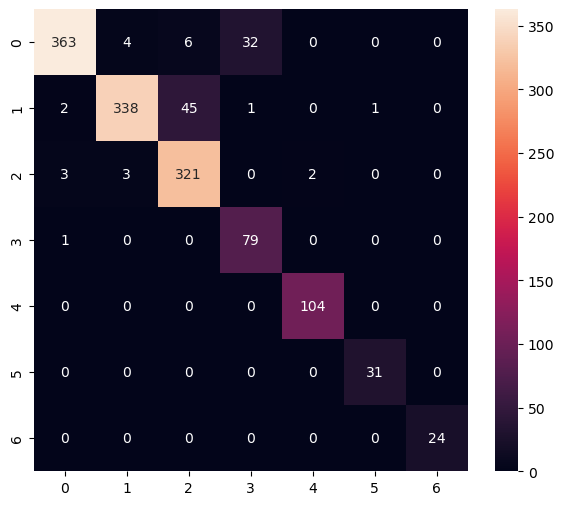

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       405
           1       0.98      0.87      0.92       387
           2       0.86      0.98      0.92       329
           3       0.71      0.99      0.82        80
           4       0.98      1.00      0.99       104
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        24

    accuracy                           0.93      1360
   macro avg       0.93      0.96      0.94      1360
weighted avg       0.94      0.93      0.93      1360



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpgfa8mn_k/assets


INFO:tensorflow:Assets written to: /tmp/tmpgfa8mn_k/assets


Saved artifact at '/tmp/tmpgfa8mn_k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  140634282345872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140634282347600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140634282346640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140634282349520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140634282349328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140634282350288: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-01 10:39:32.598634: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpgfa8mn_k
2025-04-01 10:39:32.599136: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-01 10:39:32.599146: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpgfa8mn_k
2025-04-01 10:39:32.636088: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-01 10:39:32.656265: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpgfa8mn_k
2025-04-01 10:39:32.662661: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 64028 microseconds.
2025-04-01 10:39:32.671880: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6688

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 63 μs, sys: 61 μs, total: 124 μs
Wall time: 121 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.1665650e-02 1.3076422e-01 7.8676552e-01 7.6366065e-04 5.3532835e-07
 2.4850438e-05 1.5616059e-05]
2
